In [52]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [53]:
pd.set_option( "display.max_columns", None)

data  = pd.read_csv("credit - credit.csv") 

In [54]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
4,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


In [55]:
data.drop(columns=['CLAGE', 'NINQ', 'CLNO', 'YOJ' ],inplace=True)

In [56]:
credit_encode = data
encoder=LabelEncoder()

In [57]:
credit_encode['JOB'] = encoder.fit_transform(credit_encode['JOB'].astype(str))

credit_encode['REASON'] = encoder.fit_transform(credit_encode['REASON'].astype(str))


In [58]:
data.fillna((0), inplace=True)

In [59]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,DEROG,DELINQ,DEBTINC
0,1,1100,25860.0,39025.0,1,2,0.0,0.0,0.000000
1,1,1300,70053.0,68400.0,1,2,0.0,2.0,0.000000
2,1,1500,13500.0,16700.0,1,2,0.0,0.0,0.000000
3,0,1700,97800.0,112000.0,1,1,0.0,0.0,0.000000
4,1,1700,30548.0,40320.0,1,2,0.0,0.0,37.113614


In [60]:
X = data.drop('BAD', axis = 1)
y = data.BAD

In [61]:
X.shape, y.shape

((5953, 8), (5953,))

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [63]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [64]:
    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = -1
    params["num_leaves"] = 10
    params["min_data_in_leaf"] = 20
    params["learning_rate"] = 0.03
    params["bagging_fraction"] = 0.9
    params["feature_fraction"] = 0.35
    params["feature_fraction_seed"] = 20
    params["bagging_freq"] = 10
    params["bagging_seed"] = 30
    params["'min_child_weight'"] = 0.09
    params["lambda_l1"] = 0.01
    params["verbosity"] = -1
from lightgbm import LGBMClassifier # intializing the model
model = LGBMClassifier(**params)
# fitting the model
model.fit(X_train,y_train)

[LightGBM] [Warning] min_child_weight is set=0.001, min_child_weight=0.09 will be ignored. Current value: min_child_weight=0.001
[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


LGBMClassifier("'min_child_weight'"=0.09, bagging_fraction=0.9, bagging_freq=10,
               bagging_seed=30, feature_fraction=0.35, feature_fraction_seed=20,
               lambda_l1=0.01, learning_rate=0.03, metric='auc',
               min_data_in_leaf=20, num_leaves=10, objective='binary',
               verbosity=-1)

In [65]:
y_pred = model.predict(X_test)


In [66]:
print("Testing Accuracy :", model.score(X_test, y_test))
print("Training Accuracy :", model.score(X_train,y_train))

Testing Accuracy : 0.8816120906801007
Training Accuracy : 0.8834523309533809


In [67]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[955  12]
 [129  95]]


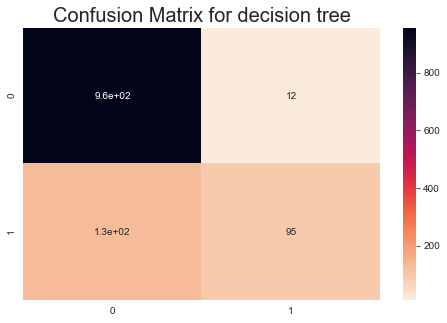

In [69]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for decision tree', fontweight = 30, fontsize = 20)
plt.show()

In [70]:

y_pred = model.predict(X_test)

In [71]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       967
           1       0.89      0.42      0.57       224

    accuracy                           0.88      1191
   macro avg       0.88      0.71      0.75      1191
weighted avg       0.88      0.88      0.86      1191



In [73]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
